# Data Science Methodology for Breast Cancer Diagnosis (DSM-BCD)

**Problema.** Colombia presenta limitaciones con respecto al acceso de la detección y el diagnóstico temprano del cáncer, provocado en la mayoría de los casos por factores como el estrato socio-económico, la cobertura del seguro de salud, el origen y la accesibilidad. En promedio, el tiempo de espera de un paciente es de 90 días desde la aparición de los síntomas hasta el diagnóstico de dicho cáncer. La primera acción para reducir la tasa de mortalidad por cáncer de mama debe estar enfocada en la agilidad del diagnóstico y el acceso oportuno a la atención.  Así, el objetivo de esta investigación es aplicar las etapas de la metodología KDD\footnote{Knowledge Discovery in Databases} al conjunto de datos de morbilidad por cáncer entre los años 2019 y 2020 en el municipio de Pereira-Risaralda. Esto con la finalidad de pronosticar y caracterizar el tipo de población mas susceptible de padecer esta enfermedad según su edad, genero, zona y régimen de salud.

**Conjunto de datos.** Un total de 817 muestras de tumores de mama se perfilaron con cinco plataformas diferentes como se ha descrito previamente (Cancer Genome Atlas Research Network, 2014) y también se perfilaron 633 casos mediante matriz de proteínas en fase inversa (RPPA)


# Análisis exploratorio de datos

In [101]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from dataprep.eda import plot, plot_correlation, plot_missing,create_report ,configs
from dataprep.clean import clean_headers
from dataprep.clean import clean_duplication
from dataprep.clean import clean_date
from dataprep.clean import clean_text
import seaborn as sns
import pandas as pd
import re
import numpy as np

### CRUDAS

In [ ]:
import seaborn as sns
import pandas as pd

with open('brca_tcga_pub2015_clinical_data.csv') as f:
    breast_cancer=pd.read_csv(f, delimiter="\t")

PATH_CRUDAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_CRUDAS\\'

breast_cancer.rename(
columns={
'Did patient start adjuvant postoperative radiotherapy?':'Did patient start adjuvant postoperative radiotherapy',
}, inplace=True)


In [126]:
a=0
for i in breast_cancer.columns:
    if breast_cancer[i].dtypes == 'float64' or breast_cancer[i].dtypes == 'int64':
        a= a +1
        #fig, ax = plt.subplots(figsize=(4, 5))
        #numerical=sns.histplot(breast_cancer[i],kde = False, color='orange', edgecolor='red',ax=ax)
        numerical=sns.histplot(breast_cancer[i],kde = False, color='orange', edgecolor='red')
        numerical.tick_params(axis='x')
        numerical.set(title=i)
        plot_num=numerical.get_figure()
        #plot_num.savefig(PATH_CRUDAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')
        plot_num.savefig(PATH_CRUDAS+str(a)+".pdf",bbox_inches = 'tight',dpi=600)    
        plt.clf()

    if breast_cancer[i].dtypes == 'object' or breast_cancer[i].dtype== 'bool' : 
        a= a +1
        #fig, ax = plt.subplots(figsize=(4, 5))
        #categorical=sns.countplot(x=breast_cancer[i], order = breast_cancer[i].value_counts().iloc[:10].index,palette="YlOrBr",ax=ax)
        categorical=sns.countplot(x=breast_cancer[i], order = breast_cancer[i].value_counts().iloc[:3].index,palette="YlOrBr")
        categorical.tick_params(axis='x')
        categorical.set(title=i)
        plot_cat = categorical.get_figure()
        #plot_cat.savefig(PATH_CRUDAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')    
        plot_cat.savefig(PATH_CRUDAS+str(a)+".pdf",dpi=600)    
        plt.clf()


<Figure size 432x288 with 0 Axes>

## DESCRIPTIVAS

In [ ]:
with open('Breast_Clean_Data.csv') as f:
    breast_clean=pd.read_csv(f, delimiter=',')

PATH_DESCRIPTIVAS = 'C:\\Users\\jamil\\OneDrive\\Escritorio\\DSM-BCD\\DSM-BCD\\NOTEBOOK\\IMAGENES_DESCRIPTIVAS\\'


a=0
for i in breast_clean.columns:
    if breast_clean[i].dtypes == 'float64' or breast_clean[i].dtypes == 'int64':
        a= a +1
        numerical=sns.histplot(breast_clean[i],kde = True,color='purple')
        numerical.tick_params(axis='x', rotation=75)
        numerical.set(title=i)
        plot_num=numerical.get_figure()
        plot_num.savefig(PATH_DESCRIPTIVAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')
        plt.clf()

    if breast_clean[i].dtypes == 'object' or breast_clean[i].dtype== 'bool' : 
        a= a +1
        categorical=sns.countplot(x=breast_clean[i], order = breast_clean[i].value_counts().iloc[:10].index,palette="flare")
        categorical.tick_params(axis='x', rotation=75)
        categorical.set(title=i)
        plot_cat = categorical.get_figure()
        plot_cat.savefig(PATH_DESCRIPTIVAS+str(a)+"_"+i+".pdf",bbox_inches = 'tight')    
        plt.clf()

<Figure size 432x288 with 0 Axes>

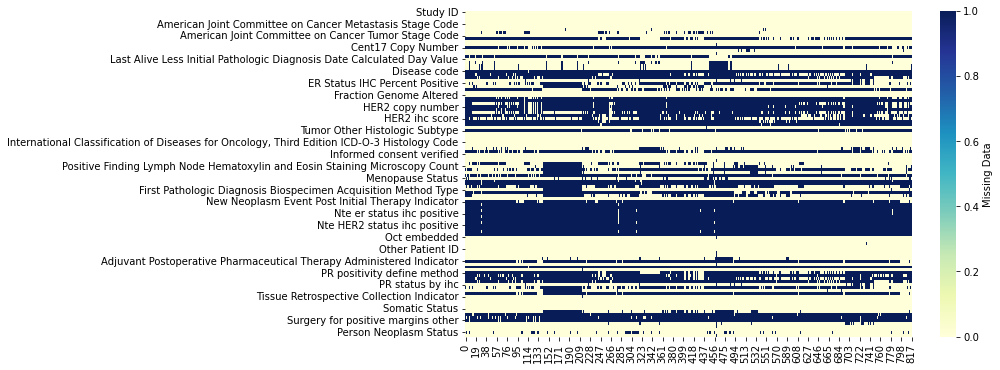

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(breast_cancer.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png",bbox_inches = 'tight', dpi=600)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(*args, **kwargs)


<Figure size 57600x4320 with 0 Axes>

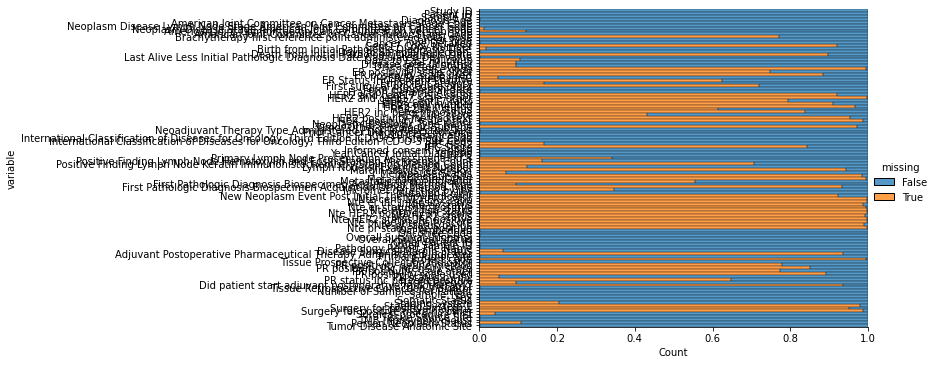

In [142]:
plt.figure(figsize=(800,60))
sns.displot(
    data=breast_cancer.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.2
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png",dpi=600)

In [ ]:

'''import seaborn as sns
import pandas as pd
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook")
sns.set_palette("husl")
numerical=sns.histplot(breast_clean['diagnosis_age'],bins=50,kde = True)
numerical.set(title='diagnosis_age')
numerical.tick_params(axis='x')
plot=numerical.get_figure()
#plot.savefig("diagnosis_age.pdf")

i='Birth from Initial Pathologic Diagnosis Date'
# Histogram 
numerical=sns.histplot(breast_cancer[i],kde = True)
numerical.tick_params(axis='x', rotation=75)
numerical.set(title=i)
plot_num=numerical.get_figure()

plot_num.savefig(PATH_CRUDAS+i+".pdf",bbox_inches = 'tight')

'''